In [12]:
import numpy as np
X=np.array([[5,3],[10,15],[15,12],[24,10],[30,30],[85,70],[71,80],[60,78],[70,55],[80,91]])

Let's plot the above data points:

<function show at 0x000001F6FEDE2C80>


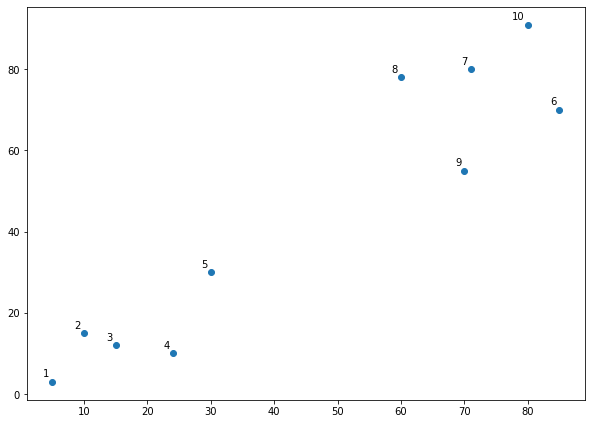

In [15]:
import matplotlib.pyplot as plt
labels=range(1,11)
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:, 0],X[:, 1],label='True Position')

    
for label,x,y in zip(labels,X[:,0],X[:,1]):
    plt.annotate(label,xy=(x,y),xytext=(-3,3),textcoords='offset points',ha='right',va='bottom')
print(plt.show)

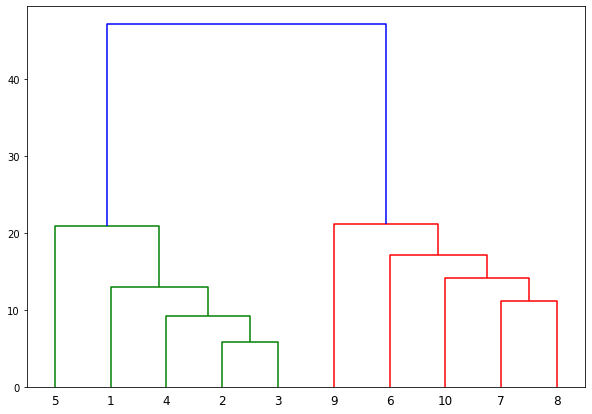

In [13]:
from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt
linked=linkage(X,'single')
labelList=range(1,11)
plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts=True)
plt.show()

The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance. If we look back at Graph1, we can see that points 2 and 3 are closest to each other while points 7 and 8 are closes to each other. Therefore a cluster will be formed between these two points first. In Graph2, you can see that the dendograms have been created joining points 2 with 3, and 8 with 7. The vertical height of the dendogram shows the Euclidean distances between points. From Graph2, it can be seen that Euclidean distance between points 8 and 7 is greater than the distance between point 2 and 3.
The next step is to join the cluster formed by joining two points to the next nearest cluster or point which in turn results in another cluster. If you look at Graph1, point 4 is closest to cluster of point 2 and 3, therefore in Graph2 dendrogram is generated by joining point 4 with dendrogram of point 2 and 3. This process continues until all the points are joined together to form one big cluster.
Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters. Take a look at the following plot:

We can see that the largest vertical distance without any horizontal line passing through it is represented by blue line. So we draw a new horizontal red line that passes through the blue line. Since it crosses the blue line at two points, therefore the number of clusters will be 2.
Basically the horizontal line is a threshold, which defines the minimum distance required to be a separate cluster. If we draw a line further down, the threshold required to be a new cluster will be decreased and more clusters will be formed as see in the image below:



28 Hierarchical Clustering go to vamshi sir notebook to understand this concept

### Hierarchical Clustering via Scikit-Learn
Now let's implement hierarchical clustering using Python's Scikit-Learn library.

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np


In [20]:
x=np.array([[5,3],[10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91]])

The next step is to import the class for clustering and call its fit_predict method to predict the clusters that each data point belongs to:

In [22]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(x)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In the code above we import the AgglomerativeClustering class from the "sklearn.cluster" library. The number of parameters is set to 2 using the n_clusters parameter while the affinity is set to "euclidean" (distance between the datapoints). Finally linkage parameter is set to "ward", which minimizes the variant between the clusters.
Next we call the fit_predict method from the AgglomerativeClustering class variable cluster. This method returns the names of the clusters that each data point belongs to. 

As expected the first five points have been clustered together while the last five points have been clustered together. It is important to mention here that these ones and zeros are merely labels assigned to the clusters and have no mathematical implications.

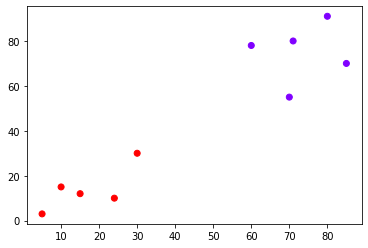

In [23]:
plt.scatter(x[:,0],x[:,1],c=cluster.labels_,cmap='rainbow')